#Schlumberger wells data analysis

## Data preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown --id 1o8PhYnmc4RhHgqPk2PRJaWpKN-aHrCRa

Downloading...
From: https://drive.google.com/uc?id=1o8PhYnmc4RhHgqPk2PRJaWpKN-aHrCRa
To: /content/dataset.csv
100% 3.18k/3.18k [00:00<00:00, 5.50MB/s]


In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,NaN,2290.0,3.563,0.080,12.254,15504.917,7.0


In [ ]:
df.describe()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
count,48.000000,48.000000,45.000000,46.000000,48.000000,48.000000,48.000000,43.000000,48.000000
mean,31.041667,1275.932292,3271.511111,2526.130435,4.198271,0.205812,11.398646,15621.992256,6.591667
std,17.526828,588.245674,914.087421,667.773585,0.954574,0.168566,1.333656,5745.320548,1.994443
min,0.000000,106.150000,1837.000000,755.500000,1.598000,0.010000,10.021000,344.583000,2.000000
25%,16.750000,935.175000,2530.500000,2086.000000,3.563000,0.090000,10.350750,12424.258500,5.000000
50%,31.500000,1284.325000,3062.000000,2473.250000,4.429000,0.155000,11.005000,15027.517000,6.000000
75%,45.250000,1631.850000,3900.000000,3033.250000,4.693750,0.260000,12.113750,18505.750000,8.000000
max,60.000000,2653.950000,5345.000000,4089.000000,6.235000,0.770000,15.648000,26874.000000,10.000000


In [ ]:
df.nunique()

Well_id               48
Reservoir Pressure    48
ISIP                  45
Closure Pressure      46
PAD Volume            42
Fluid Efficiency      31
Transmissibility      48
Total Prop Mass       43
Max Prop Conc         10
dtype: int64

In [ ]:
df.isna().mean()

Well_id               0.000000
Reservoir Pressure    0.000000
ISIP                  0.062500
Closure Pressure      0.041667
PAD Volume            0.000000
Fluid Efficiency      0.000000
Transmissibility      0.000000
Total Prop Mass       0.104167
Max Prop Conc         0.000000
dtype: float64

## Impute missing values


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed, columns=df.columns) 

In [ ]:
imputed_df.isna().mean()

Well_id               0.0
Reservoir Pressure    0.0
ISIP                  0.0
Closure Pressure      0.0
PAD Volume            0.0
Fluid Efficiency      0.0
Transmissibility      0.0
Total Prop Mass       0.0
Max Prop Conc         0.0
dtype: float64

In [ ]:
imputed_df.head()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0.0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2.0,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3.0,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4.0,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8.0,655.95,3007.7,2290.0,3.563,0.080,12.254,15504.917,7.0


## Correlation

In [ ]:
imputed_df.corr()

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
Well_id,1.000000,-0.149880,-0.268642,-0.149019,-0.442086,-0.052936,0.343453,0.459482,0.700582
Reservoir Pressure,-0.149880,1.000000,0.410217,0.582973,0.004508,0.467163,-0.419719,-0.095684,-0.312777
ISIP,-0.268642,0.410217,1.000000,0.894733,0.218969,0.141076,-0.491714,-0.428401,-0.560497
Closure Pressure,-0.149019,0.582973,0.894733,1.000000,0.131232,0.092237,-0.477106,-0.303332,-0.388072
PAD Volume,-0.442086,0.004508,0.218969,0.131232,1.000000,0.019656,-0.261602,-0.068488,-0.397962
Fluid Efficiency,-0.052936,0.467163,0.141076,0.092237,0.019656,1.000000,-0.505484,0.096226,-0.196066
Transmissibility,0.343453,-0.419719,-0.491714,-0.477106,-0.261602,-0.505484,1.000000,0.134975,0.588877
Total Prop Mass,0.459482,-0.095684,-0.428401,-0.303332,-0.068488,0.096226,0.134975,1.000000,0.659719
Max Prop Conc,0.700582,-0.312777,-0.560497,-0.388072,-0.397962,-0.196066,0.588877,0.659719,1.000000


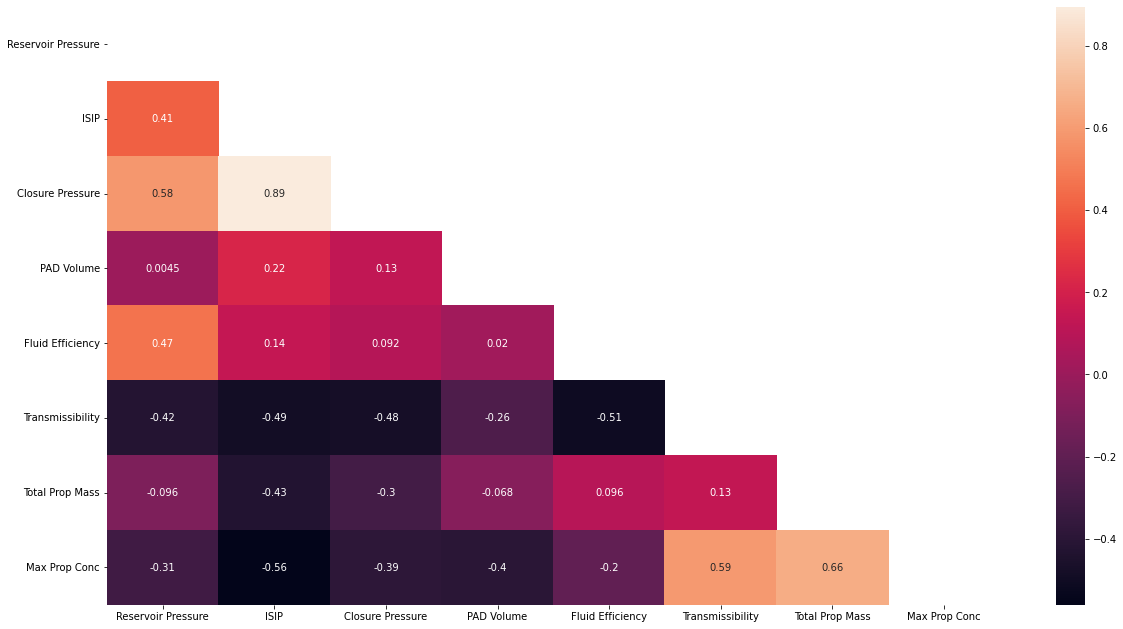

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(20,11))
upp_mat = np.triu(imputed_df.drop('Well_id', axis=1).corr())
sns.heatmap(imputed_df.drop('Well_id', axis=1).corr(), annot=True, ax=ax, mask=upp_mat)

In [ ]:
!pip install phik

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
interval_cols = imputed_df.drop('Well_id',axis=1).columns
phik_overview = imputed_df.drop('Well_id',axis=1).phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)

,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
Reservoir Pressure,1.00,0.70,0.69,0.48,0.57,0.00,0.42,0.38
ISIP,0.70,1.00,0.81,0.00,0.23,0.00,0.00,0.75
Closure Pressure,0.69,0.81,1.00,0.00,0.00,0.44,0.65,0.62
PAD Volume,0.48,0.00,0.00,1.00,0.73,0.13,0.45,0.52
Fluid Efficiency,0.57,0.23,0.00,0.73,1.00,0.00,0.00,0.00
Transmissibility,0.00,0.00,0.44,0.13,0.00,1.00,0.53,0.00
Total Prop Mass,0.42,0.00,0.65,0.45,0.00,0.53,1.00,0.72
Max Prop Conc,0.38,0.75,0.62,0.52,0.00,0.00,0.72,1.00


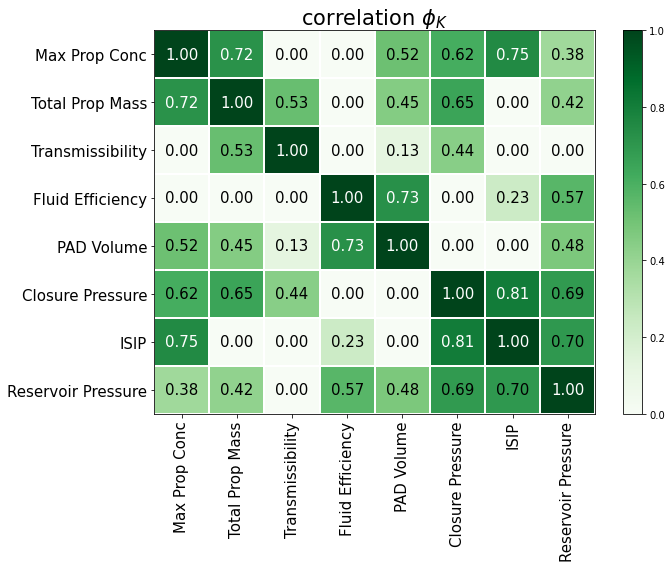

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

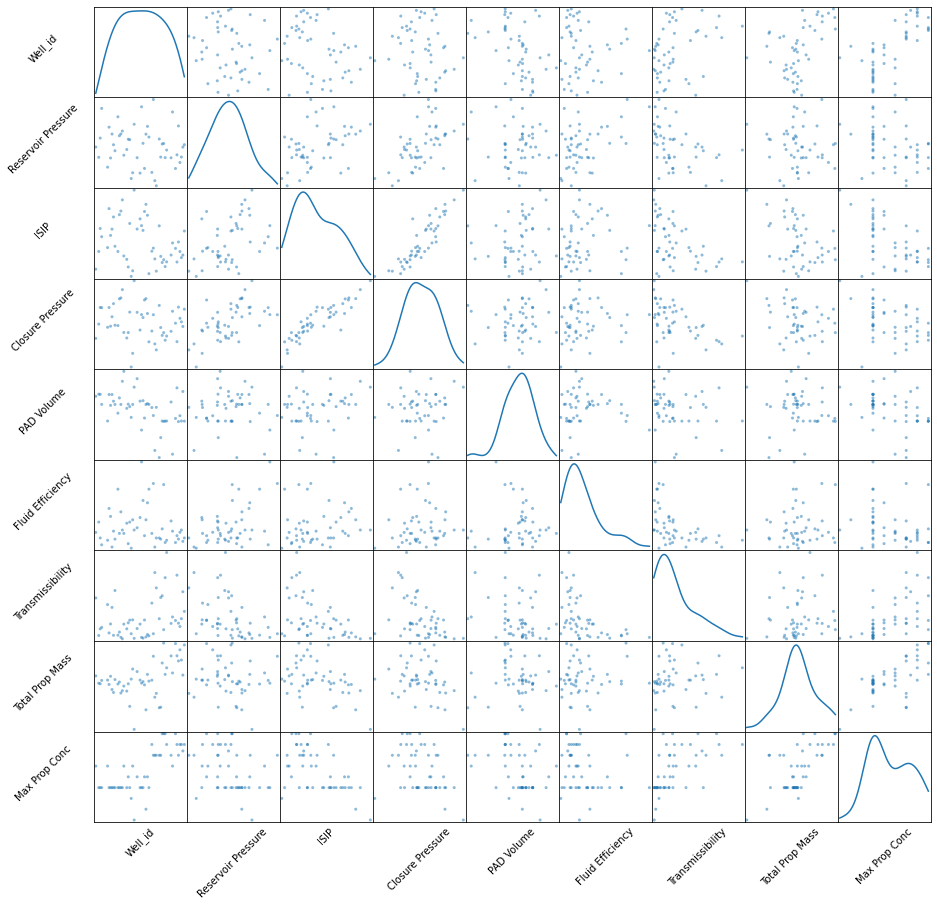

In [ ]:
# correlation viz
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
sm = scatter_matrix(imputed_df, figsize=(15,15), diagonal = 'kde')
#Changing label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]
#Changing offset for label
[s.get_yaxis().set_label_coords(-0.5,0.5) for s in sm.reshape(-1)]
#Hiding ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()


## ML Model

In [ ]:
!pip install catboost

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X = imputed_df.drop(['Total Prop Mass', 'Well_id'], axis=1)
y = imputed_df['Total Prop Mass']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [ ]:
X_train_scaled.head()

,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Max Prop Conc
0,0.418604,1.134194,0.833973,0.045037,0.169563,-0.248817,-0.845191
1,-0.457306,-0.533093,0.229132,-0.825309,-0.206125,-0.182636,1.072973
2,-0.077012,-0.617304,-0.773036,-0.058549,0.115893,-0.647310,-0.845191
3,-0.140280,0.021188,0.020012,0.177897,-0.635484,1.111413,-0.845191
4,0.442490,-0.990909,-0.436835,0.194786,-0.850163,-0.373434,-0.365650


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

Model = []
R_2 = []
RMSE = []

cv = KFold(5)

# foo to make cv
def input_scores(name, model, x, y):
  Model.append(name)
  R_2.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())
  RMSE.append(np.sqrt((-1)*cross_val_score(model, x,y,cv=cv, scoring='neg_mean_squared_error').mean()))
  print('Everything worked fine')

In [ ]:
import tqdm
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'CatBoostRegressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(),CatBoostRegressor()]

for name, model in tqdm.tqdm(zip(names, models)):
  input_scores(name, model, X_train_scaled, y_train)


2it [00:00,  7.86it/s]

Everything worked fine
Everything worked fine


4it [00:00,  7.66it/s]

Everything worked fine
Everything worked fine


5it [00:00,  8.31it/s]

Everything worked fine


6it [00:02,  1.54it/s]

Everything worked fine


7it [00:02,  1.79it/s]

Everything worked fine


8it [00:03,  1.43it/s]

Streaming output truncated to the last 5000 lines.
953:	learn: 24.2746962	total: 1.23s	remaining: 59.4ms
954:	learn: 24.1375303	total: 1.23s	remaining: 58ms
955:	learn: 24.0011740	total: 1.23s	remaining: 56.7ms
956:	learn: 23.8577049	total: 1.23s	remaining: 55.4ms
957:	learn: 23.7229776	total: 1.23s	remaining: 54.1ms
958:	learn: 23.5813009	total: 1.23s	remaining: 52.8ms
959:	learn: 23.4481827	total: 1.23s	remaining: 51.4ms
960:	learn: 23.2746138	total: 1.23s	remaining: 50.1ms
961:	learn: 23.1716520	total: 1.23s	remaining: 48.8ms
962:	learn: 23.0559822	total: 1.24s	remaining: 47.5ms
963:	learn: 22.9182743	total: 1.24s	remaining: 46.1ms
964:	learn: 22.7815018	total: 1.24s	remaining: 44.8ms
965:	learn: 22.6533821	total: 1.24s	remaining: 43.5ms
966:	learn: 22.5406061	total: 1.24s	remaining: 42.2ms
967:	learn: 22.4061678	total: 1.24s	remaining: 40.9ms
968:	learn: 22.2802276	total: 1.24s	remaining: 39.6ms
969:	learn: 22.1474800	total: 1.24s	remaining: 38.3ms
970:	learn: 22.0375286	total: 1.2

9it [00:18,  5.19s/it]

948:	learn: 24.9048641	total: 962ms	remaining: 51.7ms
949:	learn: 24.7559294	total: 963ms	remaining: 50.7ms
950:	learn: 24.6454069	total: 964ms	remaining: 49.7ms
951:	learn: 24.5357847	total: 967ms	remaining: 48.8ms
952:	learn: 24.4126763	total: 969ms	remaining: 47.8ms
953:	learn: 24.2746962	total: 971ms	remaining: 46.8ms
954:	learn: 24.1375303	total: 972ms	remaining: 45.8ms
955:	learn: 24.0011740	total: 974ms	remaining: 44.8ms
956:	learn: 23.8577049	total: 975ms	remaining: 43.8ms
957:	learn: 23.7229776	total: 976ms	remaining: 42.8ms
958:	learn: 23.5813009	total: 977ms	remaining: 41.8ms
959:	learn: 23.4481827	total: 978ms	remaining: 40.8ms
960:	learn: 23.2746138	total: 979ms	remaining: 39.7ms
961:	learn: 23.1716520	total: 980ms	remaining: 38.7ms
962:	learn: 23.0559822	total: 982ms	remaining: 37.7ms
963:	learn: 22.9182743	total: 983ms	remaining: 36.7ms
964:	learn: 22.7815018	total: 984ms	remaining: 35.7ms
965:	learn: 22.6533821	total: 985ms	remaining: 34.7ms
966:	learn: 22.5406061	total

9it [00:18,  2.10s/it]


In [ ]:
df_results = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_2})
df_results.sort_values('RMSE')

,Model,RMSE,R Squared
5,Random Forest Regressor,4859.460249,0.083276
7,Adaboost Regressor,4927.734286,0.116765
8,CatBoostRegressor,5315.589536,-0.051383
6,Gradient Boosting Regressor,5442.544862,-0.116962
1,Ridge Regression,5588.487209,-0.173568
2,Lasso Regression,5921.790430,-0.321664
0,Linear Regression,5927.250927,-0.324116
3,K Neighbors Regressor,6081.367956,-0.438918
4,Decision Tree Regressor,6205.830039,-0.483273


In [ ]:
# Random Forest Regressor is our baseline model

In [ ]:
rfc = RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error']
}

g_s = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv)

g_s.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
g_s.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1 = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='squared_error')

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=42)

In [ ]:
pred = rfc1.predict(X_test)

In [ ]:

print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

4237.891963760202
0.07164290105881921


In [ ]:
result = pd.DataFrame({'actual':y_test, 'predicted':pred})

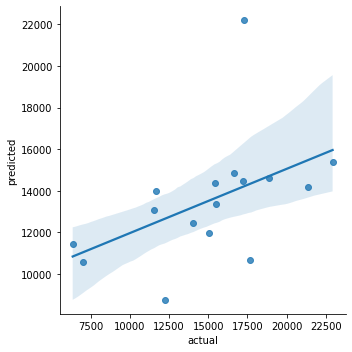

In [ ]:
import seaborn as sns
sns.lmplot(x='actual',y='predicted',data=result,fit_reg=True) 

In [ ]:
result

,actual,predicted
27,17250.0000,14484.493239
40,17692.6166,10677.028652
26,6363.0830,11445.576638
43,21381.0830,14181.824187
24,15027.5170,11971.346633
37,17259.4632,22192.515071
12,11527.3170,13049.535512
19,18889.1670,14621.928946
4,15504.9170,13354.191028
25,14037.0000,12457.756507
